In [3]:
import pandas as pd

# Introduction to Digital Forensics - Assignment 2

Contributors (Project group 2):
- Carlos de Bourbon de Parme
- Vera Schockemöhle
- Floor Schutrups
- Jelle Hulter
- Nora Yigit
- Arda Öz

# 1. Introduction/Motivation

# 2. Methodology

Answers of the questions are organized such that each subsection of the methodology section is answer to a question with the same number.

We begin our investigation by exporting the wireshark trace as a csv and importing it using pandas:

In [4]:
df = pd.read_csv("trace.csv")
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::a00:27ff:fe43:73bc,ff02::16,ICMPv6,90,Multicast Listener Report Message v2
1,2,0.005827,0.0.0.0,255.255.255.255,DHCP,330,DHCP Request - Transaction ID 0x79e3d163
2,3,0.006234,10.0.2.2,10.0.2.15,DHCP,590,DHCP ACK - Transaction ID 0x79e3d163
3,4,0.006299,PcsCompu_43:73:bc,Broadcast,ARP,42,Who has 10.0.2.2? Tell 10.0.2.15
4,5,0.006494,RealtekU_12:35:02,PcsCompu_43:73:bc,ARP,60,10.0.2.2 is at 52:54:00:12:35:02
...,...,...,...,...,...,...,...
1800,1801,227.637321,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50556 > 80 [SYN] Seq=0 ...
1801,1802,227.637322,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50558 > 80 [SYN] Seq=0 ...
1802,1803,227.637324,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50560 > 80 [SYN] Seq=0 ...
1803,1804,227.637325,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50562 > 80 [SYN] Seq=0 ...


## 2.1 - Number of Records

Looking at the number of rows in our dataframe, we see that the number of records in the entire trace is 1805.

## 2.2 - Duration of the Trace

We see that the time point of the first record is 0.0 and the last one is 227.6, therefore the duration is 227.6 seconds.

In [5]:
df.iloc[[0,-1]]

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::a00:27ff:fe43:73bc,ff02::16,ICMPv6,90,Multicast Listener Report Message v2
1804,1805,227.637327,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50564 > 80 [SYN] Seq=0 ...


## 2.3 - 3 Packets Which are not Part of the Attack

## 2.4 - Characterisitcs of the Attack

## 2.5 - 

## 2.6 - Target

Looking at the number of times each ip address appears in the "Destination" column, we observe that the target is the ip address "192.168.1.183":

In [7]:
df['Destination'].value_counts()[:5]

192.168.1.183      1000
10.0.2.15           415
142.250.179.132     159
142.250.179.182      28
172.217.168.194      23
Name: Destination, dtype: int64

We use the dataframe of the attack from now on for answering the questions:

In [40]:
attack_df = df[df['Destination'] == "192.168.1.183"]
attack_df

,No.,Time,Source,Destination,Protocol,Length,Info
803,804,212.015319,10.0.2.15,192.168.1.183,TCP,74,50322 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
804,805,212.016106,10.0.2.15,192.168.1.183,TCP,74,50324 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
805,806,212.022788,10.0.2.15,192.168.1.183,TCP,74,50326 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
806,807,212.024038,10.0.2.15,192.168.1.183,TCP,74,50328 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
807,808,212.028178,10.0.2.15,192.168.1.183,TCP,74,50330 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
...,...,...,...,...,...,...,...
1800,1801,227.637321,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50556 > 80 [SYN] Seq=0 ...
1801,1802,227.637322,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50558 > 80 [SYN] Seq=0 ...
1802,1803,227.637324,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50560 > 80 [SYN] Seq=0 ...
1803,1804,227.637325,10.0.2.15,192.168.1.183,TCP,74,[TCP Retransmission] 50562 > 80 [SYN] Seq=0 ...


## 2.7 - Number of Records in the Attack

Looking at the numbers above, we observed that there were 1000 records belonging to the attack.

## 2.8 - Unique IPs in the Attack

When we selected the records with "192.168.1.183" as the target and looked at the Source IPs, we observed that there is only one IP address. That IP address is '10.0.2.15':

In [41]:
attack_df['Source'].unique()

array(['10.0.2.15'], dtype=object)

## 2.14 - Data Rate Peak

To calculate the data rate over time, we can use the "Time" column of our dataset. We can convert the float values to integers and calculate the total length of packages during that second:

In [48]:
attack_df.loc[:, 'DiscreteTime'] = attack_df['Time'].astype('int')
grouped_by_time = attack_df.groupby('DiscreteTime').sum()
grouped_by_time

C:\Users\user\anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,No.,Time,Length
DiscreteTime,,,
212,180700,42433.632573,14800
213,220700,42637.956747,14800
215,260700,43041.044557,14800
219,301100,43872.703427,14800
227,341100,45510.877545,14800


When we plot the data rate, we see the following plot. For this case, data rate stays stable.

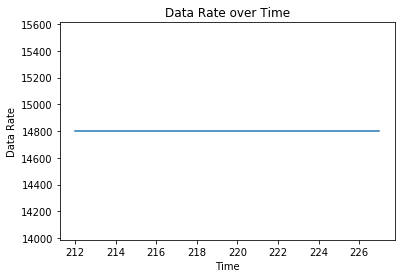

In [53]:
grouped_by_time['Length'].plot(xlabel='Time', ylabel='Data Rate', title='Data Rate over Time')

## 2.16 - Packet Lenght Distribution

When we plot a pie chart to see the distribution of the packet lengths in the attack, we observed that all the packages in the attack have the same size, 74.

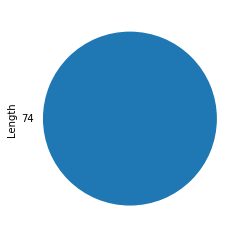

In [29]:
attack_df['Length'].value_counts().plot.pie()

# 3. Conclusion